In [1]:
#工業数学A2_後半レポート
#１次元Laplace方程式の境界値問題
#差分法 #有限要素法

In [2]:
%reset -f

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import integrate

In [4]:
def analytical_u(x): #u(x)の解析解
    return -1/12*x**4+1/6*x**3+5/6*x

In [5]:
def cal_f(x): #f(x)=x^2-x
    return x**2-x

In [6]:
a=0 #左端x_0
b=1 #右端x_n
N=100 #刻み数
h=(b-a)/N #ステップ幅

alpha=analytical_u(a) #解析解から求めたu(x_0)=u_0
beta=analytical_u(b) #解析解から求めたu(x_n)=u_n

In [7]:
###差分法

In [20]:
x=np.arange(a,b+h,h) #x_1 ~ x_{n-1}を生成
vec_b1=-h**2*cal_f(x[1:N])
vec_b1[-1]-=beta
A1=np.zeros((N-1,N-1)) #(n-1)×(n-1)のゼロ行列を生成
B=np.ones(N-1) #n-1次の単位ベクトルを生成
C=np.ones(N-2) #n-2次の単位ベクトルを生成
A1+=-2*np.diag(B)+np.diag(C,k=1)+np.diag(C,k=-1)
#A1[N-2][N-2]=-1
print(A1)
u_CDS=np.zeros(N+1)
u_CDS[1:N]=np.dot(np.linalg.inv(A1),vec_b1)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


<function matplotlib.pyplot.show(close=None, block=None)>

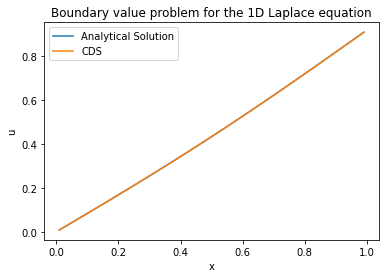

In [21]:
#x_1 ~ x_{n-1}でプロット
#plt.figure(figsize=(4,4))
plt.plot(x[1:N],analytical_u(x[1:N]), label="Analytical Solution") #解析解
plt.plot(x[1:N],u_CDS[1:N], label="CDS") #差分法
plt.xlabel("x")
plt.ylabel("u")
plt.title("Boundary value problem for the 1D Laplace equation") #１次元Laplace方程式の境界値問題
plt.legend()
plt.show

解析解と数値解との誤差（の絶対値）の平均は、1.4027777797078427e-06


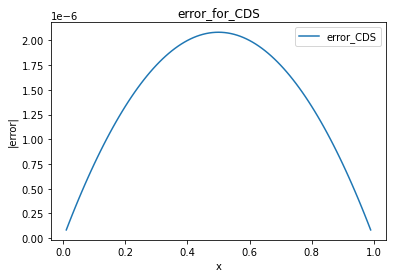

In [22]:
e_CDS=np.abs(u_CDS[1:N]-analytical_u(x[1:N]))
plt.plot(x[1:N],e_CDS, label="error_CDS") #差分法
plt.xlabel("x")
plt.ylabel("|error|")
plt.title("error_for_CDS")
plt.legend()
plt.show
print(f"解析解と数値解との誤差（の絶対値）の平均は、{e_CDS.mean()}")

In [11]:
###有限要素法

In [12]:
def cal_M(x_con, j): #M_j
    if j!=0 and j!=N:
        if x[j]<x_con and x_con<=x[j]:
            return (x_con-x[j-1])/h
        elif x[j]<x_con and x_con<=x[j+1]:
            return (x[j+1]-x_con)/h
        else:
            return 0
    elif j==0:
        if x[j]<x_con and x_con<x[j+1]:
            return (x[j+1]-x_con)/h
        else:
            return 0
    elif j==N:
        if x[j-1]<x_con and x_con<x[j]:
            return (x_con-x[j-1])/h
        else:
            return 0

In [13]:
def cal_dM(x_con, j): #dM_j/dx
    if j!=0 and j!=N:
        if x[j]<x_con and x_con<=x[j]:
            return 1/h
        elif x[j]<x_con and x_con<=x[j+1]:
            return -1/h
        else:
            return 0
    elif j==0:
        if x[j]<x_con and x_con<x[j+1]:
            return -1/h
        else:
            return 0
    elif j==N:
        if x[j-1]<x_con and x_con<x[j]:
            return 1/h
        else:
            return 0

In [14]:
def cal_dMidMj(x_con,i,j): #(dM_i/dx)*(dM_j/dx)
    return cal_dM(x_con,i)*cal_dM(x_con,j)

In [15]:
def cal_Mf(x_con,i): #M*f
    return cal_M(x_con,i)+cal_f(x_con)

In [16]:
A2=np.zeros((N+1,N+1))
A2[0][0]=1
for i in range(1,N+1):
    for j in range(1,N+1):
        A2[i][j]=integrate.quad(cal_dMidMj,a,b,args=(i,j))[0] #scipyで積分計算
vec_b2=np.zeros(N+1)
vec_b2[N]=1
for i in range(1,N):
    vec_b2[i]=integrate.quad(cal_Mf,a,b,args=i)[0] #scipyで積分計算

/var/folders/q5/2pltq2hx00sd4f2blglh153w0000gn/T/ipykernel_12221/557680883.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  A2[i][j]=integrate.quad(cal_dMidMj,a,b,args=(i,j))[0] #scipyで積分計算


In [17]:
u_FEM=np.zeros(N+1)
u_FEM[1:N]=np.dot(np.linalg.pinv(A1),vec_b1)

<function matplotlib.pyplot.show(close=None, block=None)>

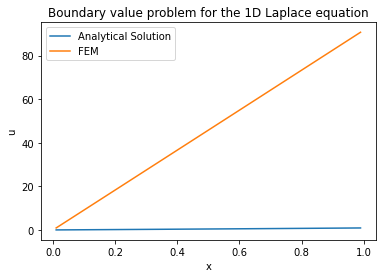

In [18]:
#x_1 ~ x_{n-1}でプロット
#plt.figure(figsize=(4,4))
plt.plot(x[1:N],analytical_u(x[1:N]), label="Analytical Solution") #解析解
plt.plot(x[1:N],u_FEM[1:N], label="FEM") #有限要素法
plt.xlabel("x")
plt.ylabel("u")
plt.title("Boundary value problem for the 1D Laplace equation") #１次元Laplace方程式の境界値問題
plt.legend()
plt.show

解析解と数値解との誤差（の絶対値）の平均は、45.333336097245905


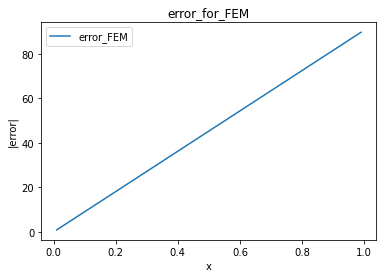

In [19]:
e_FEM=np.abs(u_FEM[1:N]-analytical_u(x[1:N]))
plt.plot(x[1:N],e_CDS, label="error_FEM") #有限要素法
plt.xlabel("x")
plt.ylabel("|error|")
plt.title("error_for_FEM")
plt.legend()
plt.show
print(f"解析解と数値解との誤差（の絶対値）の平均は、{e_FEM.mean()}")